In [1]:
import numpy as np
import xarray as xr
import sys
import matplotlib.pyplot as plt
import densite
import restart

import importlib
importlib.reload(restart)

<module 'restart' from '/home/mtissot/SpinUp/jumper/restart.py'>

# **Load files**

In [2]:
#Should be calculated in the update_e3tm function
# TO DO :
#     - get deptht from e3t et ssh
#     - e3T vs e3T updated probleme sur le mask bathy 
#     - Mauvais calcul de la densité : pas les bonnes unités
#     - Regulariser ou non ? 
#     - resultats bizarres vitesses 

### 1.1 - Predictions

In [3]:
zos_new    = np.load("/data/mtissot/simus_predicted/zos.npy")       #or ssh sea surface height  t*y*x
so_new     = np.load("/data/mtissot/simus_predicted/so.npy")        #salinity t*z*y*x
thetao_new = np.load("/data/mtissot/simus_predicted/thetao.npy")    #temperature t*z*y*x

print(np.shape(zos_new))
print(np.shape(so_new))
print(np.shape(thetao_new))

(30, 331, 360)
(30, 75, 331, 360)
(30, 75, 331, 360)


### 1.2 - Maskdataset

In [4]:
MASKdataset    = xr.open_dataset('/thredds/idris/work/ues27zx/eORCA1.4.2_mesh_mask_modJD.nc',decode_times=False) 
print("features : ", list(MASKdataset.keys()))

features :  ['e1f', 'e1t', 'e1u', 'e1v', 'e2f', 'e2t', 'e2u', 'e2v', 'e3f_0', 'e3t_0', 'e3t_1d', 'e3u_0', 'e3uw_0', 'e3v_0', 'e3vw_0', 'e3w_0', 'e3w_1d', 'ff_f', 'ff_t', 'fmask', 'gdept_0', 'gdept_1d', 'gdepw_0', 'gdepw_1d', 'glamf', 'glamt', 'glamu', 'glamv', 'gphif', 'gphit', 'gphiu', 'gphiv', 'mbathy', 'misf', 'nav_lev', 'time_counter', 'tmask', 'tmaskutil', 'umask', 'umaskutil', 'vmask', 'vmaskutil', 'gridx', 'gridy']


### 1.3 - Restart file

In [5]:
restarts_file = "/thredds/idris/work/ues27zx/Restarts/"
restart_name  = "OCE_CM65v420-LR-CdL-pi-01_19141231_restart_0142.nc"  #pour chaque fichier de restart 
Restart       = xr.open_dataset(restarts_file+restart_name,decode_times=False)

x_slice,y_slice = restart.getXYslice(Restart)

print("x slice  : ",x_slice)
print("y slice  : ",y_slice)
print("\nfeatures : ", list(Restart.keys()))

x slice  :  slice(38, 57, None)
y slice  :  slice(154, 168, None)

features :  ['xx', 'yy', 'kt', 'ndastp', 'adatrj', 'ntime', 'fwfisf_par_b', 'isf_hc_par_b', 'isf_sc_par_b', 'nn_fsbc', 'ssu_m', 'ssv_m', 'sst_m', 'sss_m', 'ssh_m', 'e3t_m', 'frq_m', 'rnf_b', 'rnf_hc_b', 'rnf_sc_b', 'utau_b', 'vtau_b', 'qns_b', 'emp_b', 'sfx_b', 'en', 'avt_k', 'avm_k', 'dissl', 'ub2_b', 'vb2_b', 'un_bf', 'vn_bf', 'sbc_hc_b', 'sbc_sc_b', 'qsr_hc_b', 'fraqsr_1lev', 'frc_v', 'frc_t', 'frc_s', 'surf_ini', 'ssh_ini', 'e3t_ini', 'tmask_ini', 'hc_loc_ini', 'sc_loc_ini', 'rdt', 'sshb', 'ub', 'vb', 'tb', 'sb', 'sshn', 'un', 'vn', 'tn', 'sn', 'rhop']


# **Update one restart file**

### 2.1 - zos, so and Thetao update

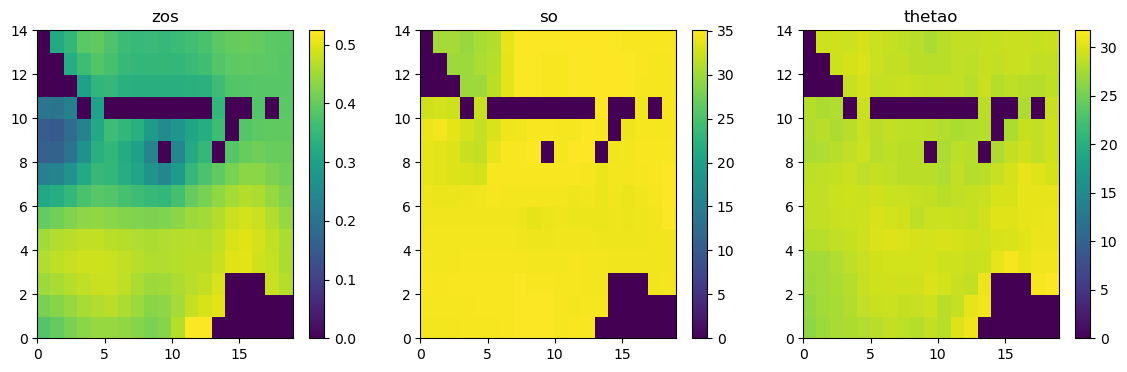

In [7]:
fig, axes = plt.subplots(1,3, figsize=(14,4))
a = axes[0].pcolor(Restart["sshn"][0])
axes[0].set_title('zos')
fig.colorbar(a, ax=axes[0])
a = axes[1].pcolor(Restart["sn"][0,0])
axes[1].set_title('so')
fig.colorbar(a, ax=axes[1])
a = axes[2].pcolor(Restart["tn"][0,0])
axes[2].set_title('thetao')
fig.colorbar(a, ax=axes[2])

In [8]:
restart.update_pred(Restart,zos_new,so_new,thetao_new)

print("sn shape    : ",np.shape(Restart["sn"]))
print("tn shape    : ",np.shape(Restart["tn"]))
print("sshn shape  : ",np.shape(Restart["sshn"]))
print("sss_m shape : ",np.shape(Restart["sss_m"]))
print("sss_t shape : ",np.shape(Restart["sst_m"]))

sn shape    :  (1, 75, 14, 19)
tn shape    :  (1, 75, 14, 19)
sshn shape  :  (1, 14, 19)
sss_m shape :  (1, 14, 19)
sss_t shape :  (1, 14, 19)


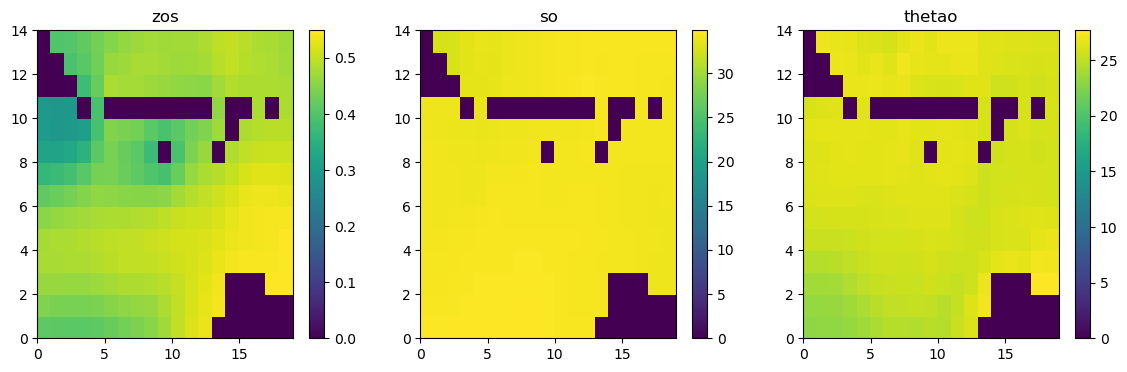

In [9]:
fig, axes = plt.subplots(1,3, figsize=(14,4))
a = axes[0].pcolor(Restart["sshn"][0])
axes[0].set_title('zos')
fig.colorbar(a, ax=axes[0]);
a = axes[1].pcolor(Restart["sn"][0,0])
axes[1].set_title('so')
fig.colorbar(a, ax=axes[1]);
a = axes[2].pcolor(Restart["tn"][0,0])
axes[2].set_title('thetao')
fig.colorbar(a, ax=axes[2]);

### 2.2 - e3t and deptht

In [10]:
array      = xr.open_dataset("/scratchu/mtissot/SIMUp6Y/CM65v420-LR-CdL-pi-01_18500101_19491231_1M_so.nc.YAVG.nc" , decode_times=False)
deptht_new = np.tile(array.deptht.values, (1,360,331,1)).transpose(0,3,2,1)[:,:,y_slice,x_slice]  #thickness of all 75 levels
print("deptht shape : ", np.shape(deptht_new))

deptht shape :  (1, 75, 14, 19)


Text(0.5, 1.0, 'e3t_m')

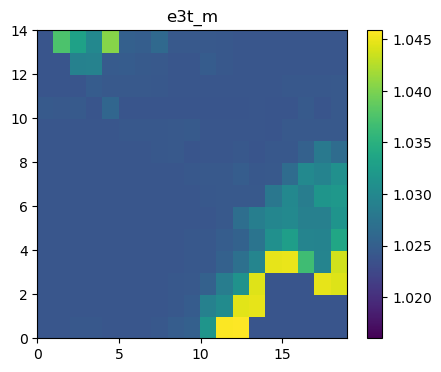

In [11]:
fig = plt.figure(figsize=(5,4))
plt.pcolor(Restart["e3t_m"][0],vmin=1.016)
plt.colorbar()
plt.title("e3t_m")
#x=Restart["e3t_m"][0,0]

In [12]:
e3t_new,depth_mauvais = restart.update_e3tm(MASKdataset,Restart)

print("e3_m shape   : ",np.shape(Restart["e3t_m"]))
print("e3t shape    : ",np.shape(e3t_new))
print("deptht shape : ",np.shape(deptht_new))

e3_m shape   :  (1, 14, 19)
e3t shape    :  (1, 75, 14, 19)
deptht shape :  (1, 75, 14, 19)


Text(0.5, 1.0, 'e3t_m')

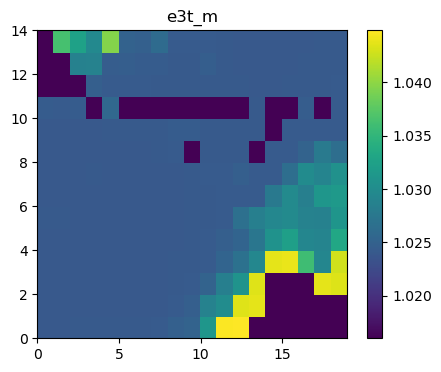

In [13]:
fig = plt.figure(figsize=(5,4))
plt.pcolor(Restart["e3t_m"][0],vmin=1.016)
plt.colorbar()
plt.title("e3t_m")

### 2.3 - rhop update

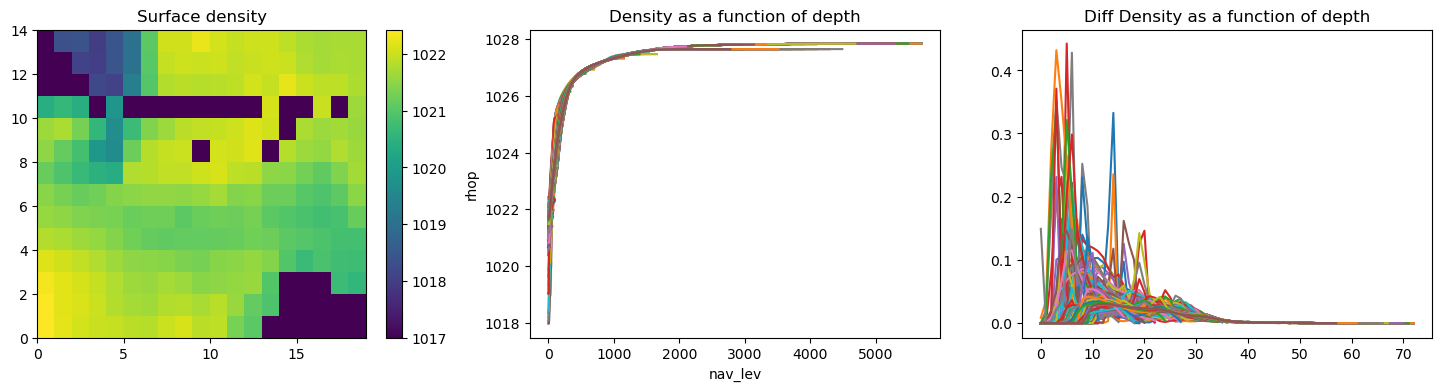

In [14]:
restart.plot_density_infos(Restart,e3t_new,min_=1017)

In [15]:
restart.update_rhop(Restart,thetao_new,so_new)

print("rhop shape : ",np.shape(Restart["rhop"]))

rhop shape :  (1, 75, 14, 19)


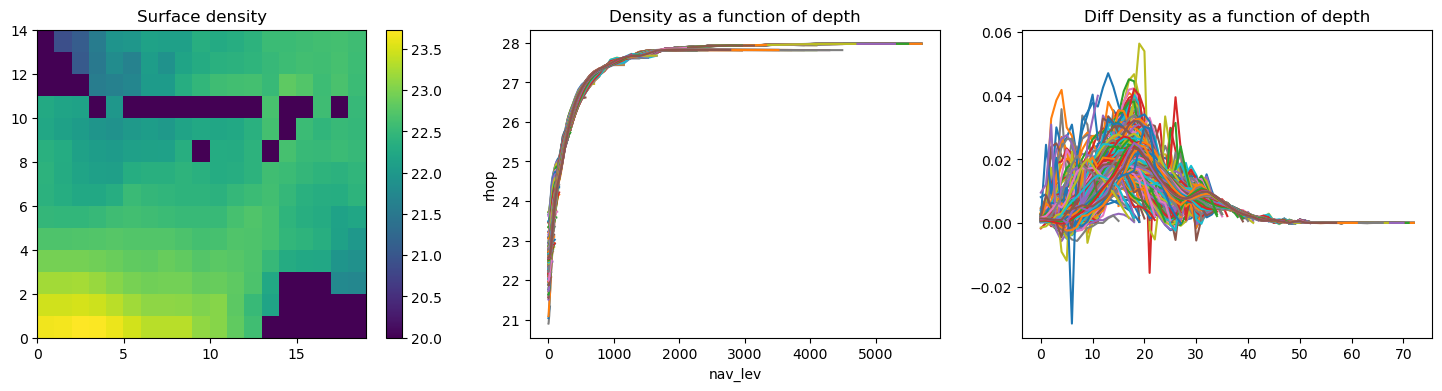

In [16]:
restart.plot_density_infos(Restart,e3t_new,min_=20)

### regularisation

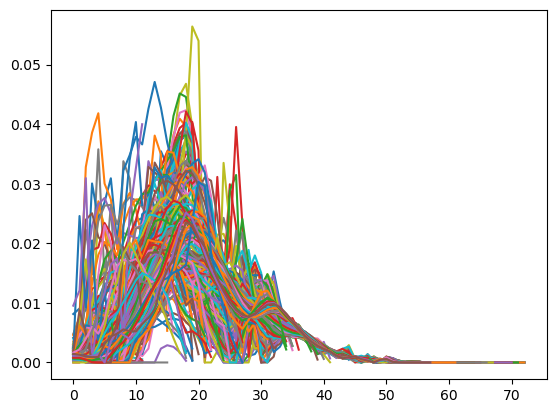

In [17]:
rhop = np.array(Restart['rhop'].where(Restart["rhop"][0] != 0., np.nan))
rhop_reg = restart.regularize_rho(np.copy(rhop))

diff_reg = np.diff(rhop_reg[0], axis=0)/e3t_new[0,:-1]
for i in range(19): 
    for j in range(14):
        plt.plot(diff_reg[:,j,i])

### 2.4 - velocities update

In [18]:
import importlib
importlib.reload(restart)

<module 'restart' from '/home/mtissot/SpinUp/jumper/restart.py'>

Text(0.5, 1.0, 'Zonal U surface velocity')

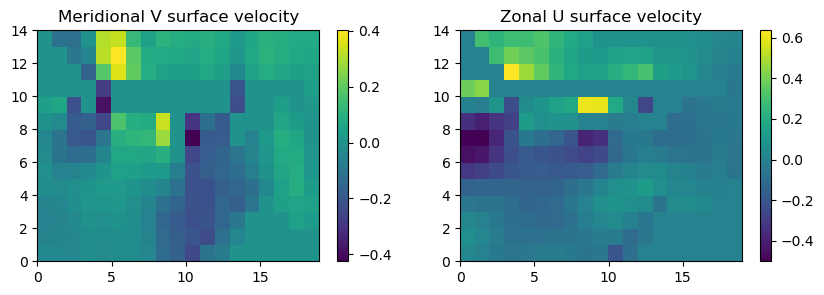

In [19]:
fig, axes = plt.subplots(1,2, figsize=(10,3))
a = axes[0].pcolor(Restart["vn"][0,0])
axes[0].set_title('Meridional V surface velocity')
fig.colorbar(a, ax=axes[0])
a = axes[1].pcolor(Restart["un"][0,0])
fig.colorbar(a, ax=axes[1])
axes[1].set_title('Zonal U surface velocity')

In [20]:
v = restart.update_v_velocity(Restart,MASKdataset,e3t_new[0])
u = restart.update_u_velocity(Restart,MASKdataset,e3t_new[0])

/tmp/ipykernel_1648864/1059412851.py:6: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(a, ax=axes[1])


Text(0.5, 1.0, 'Zonal U surface velocity')

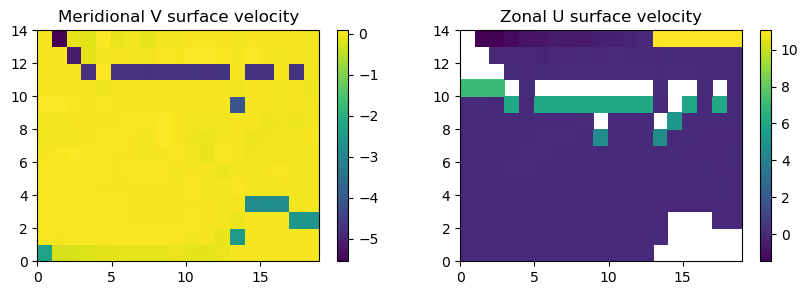

In [21]:
fig, axes = plt.subplots(1,2, figsize=(10,3))
a = axes[0].pcolor(v[0,0])
axes[0].set_title('Meridional V surface velocity')
fig.colorbar(a, ax=axes[0])
a = axes[1].pcolor(u[0,0])
fig.colorbar(a, ax=axes[1])
axes[1].set_title('Zonal U surface velocity')

# **Save restart file**

In [33]:
Restart = Restart.rename_vars({'xx': 'x','yy':'y'})             #inverse transformation of x and y vars
#Restart.to_netcdf(restarts_file+restart_name)

----

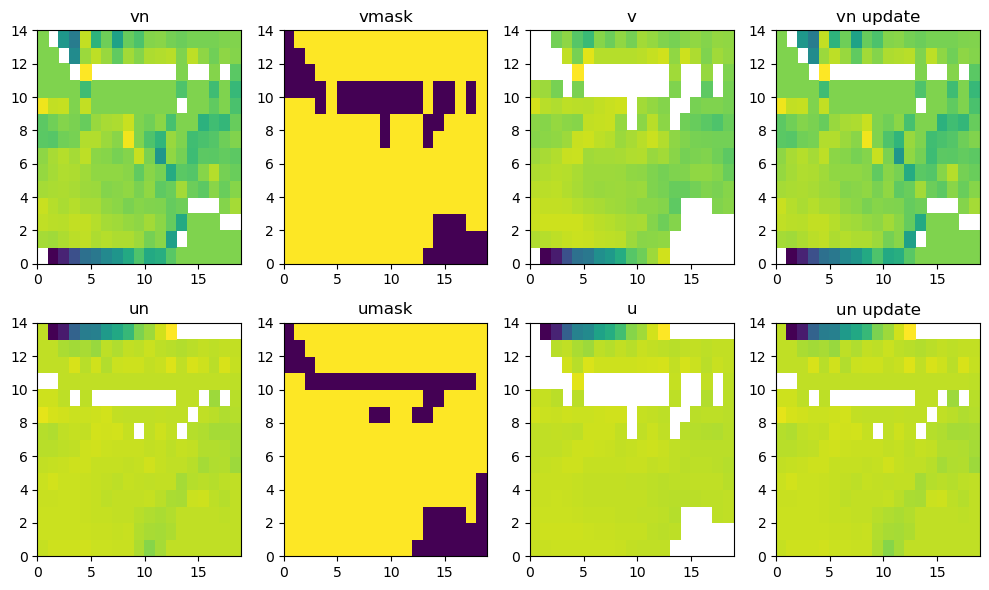

In [26]:
fig, axes = plt.subplots(2,4, figsize=(10,6))
axes[0,0].pcolor(vn[0,0])
axes[0,1].pcolor(vmask[-1,0])
axes[0,2].pcolor(v_new[0])
axes[0,3].pcolor(vn_new[-1,0])

axes[1,0].pcolor(un[0,0])
axes[1,1].pcolor(umask[-1,0])
axes[1,2].pcolor(u_new[0])
axes[1,3].pcolor(un_new[-1,0])

names = ["vn","vmask","v","vn update","un","umask","u","un update"]
for i, ax in enumerate(axes.flat):
    ax.set_title(names[i])

plt.tight_layout()

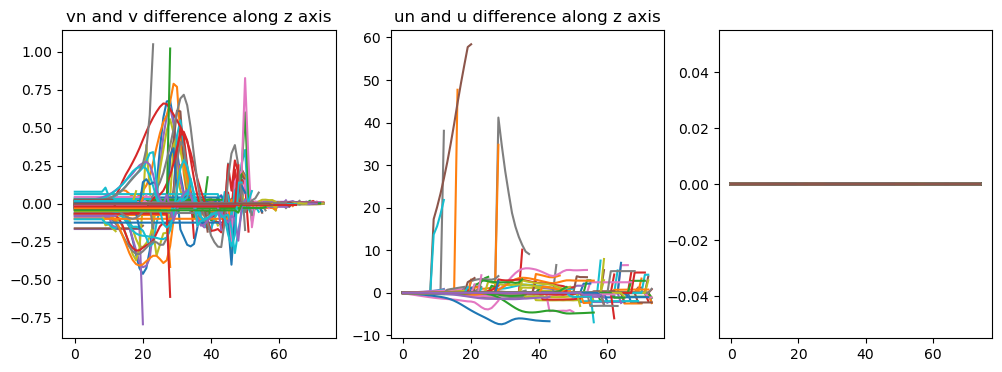

In [27]:
fig, axes = plt.subplots(1,3, figsize=(12,4))
for i in range(np.shape(vn)[3]):
    for j in range(np.shape(vn)[2]):
        axes[0].plot(vn_new[0,:,j,i]-v_new[:,j,i])
        axes[1].plot(un_new[0,:,j,i]-u_new[:,j,i])
        axes[0].set_title("vn and v difference along z axis")
        axes[1].set_title("un and u difference along z axis")
        axes[2].plot(vn[-1,:,j,i]-vn_new[-1,:,j,i])